# Rastringin Function

$$f(x) = An + \sum_{i = 1}^{n} [x_i^2 + A \cos(2 \pi x_i)]$$
where $A = 10$ and $x_i \in [-5.12, 5.12]$ has lots of local minima and a global minimum at $x=0$.

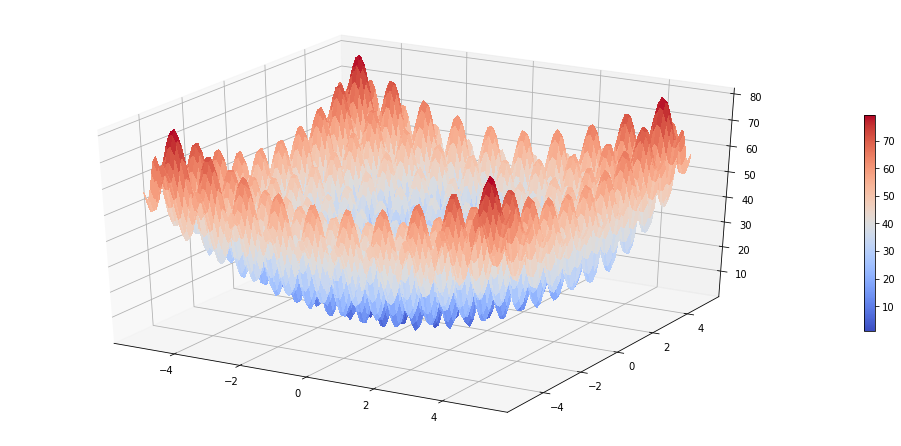

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def rastringin(x, y):
    return 10 * 2 + (np.square(x) - 10 * np.cos(2*np.pi*x))+(np.square(y) - 10 * np.cos(2*np.pi*y))

X, Y = np.meshgrid(np.linspace(-5.12, 5.12, 100), np.linspace(-5.12, 5.12, 100))
Z = rastringin(X, Y)
fig = plt.figure(figsize=(14,6))
ax = Axes3D(fig)
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

## Fining the minimum using CatSwarmOptimization

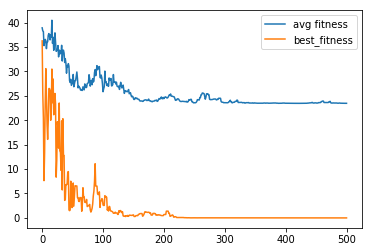

[-5.65664776e-06  6.79747661e-06]


In [5]:
import metapy as mp
from metapy.algorithms import CatSwarmOptimization

class RastringinCSO(CatSwarmOptimization):
    def fitness(self, cat):
        return rastringin(cat[0], cat[1])
    
    def move(self, cat, best_cat, current_velocity, velocity_factor, max_velocity):
        return mp.moving.move_continuous(cat, best_cat, current_velocity, velocity_factor, max_velocity)
    
    def alter_position(self, cat, seeking_range_per_direction, counts_of_dimenstions_to_change):
        return mp.moving.alter_position_continuous(cat, seeking_range_per_direction, counts_of_dimenstions_to_change)
    
    def init_population(self):
        return [np.random.uniform(-5.12, 5.12, 2)] * self.population_size
        
    def init_velocities(self):
        return [np.random.uniform(-0.5, 0.5)] * self.population_size
    
cso = RastringinCSO(mixture_ratio=0.2,
                    seeking_memory_pool=20,
                    seeking_range_per_dimension=[1, 1],
                    count_of_dimensions_to_change=1,
                    self_position_consideration=True,
                    velocity_factor=2,
                    max_velocity=np.array([0.2, 0.2]),
                    fitmax=80,
                    fitmin=0,
                    minimize=True)

res = cso.optimize(500)
plt.plot(np.arange(0, len(res.averaged_progress)), res.averaged_progress, label="avg fitness")
plt.plot(np.arange(0, len(res.best_progress)), res.best_progress, label="best_fitness")
plt.legend()
plt.show()
print(res.solution)

In [3]:
res.optimizer_settings

{'mixture_ratio': 0.2,
 'seeking_memory_pool': 20,
 'seeking_range_per_dimension': [1, 1],
 'count_of_dimensions_to_change': 1,
 'self_position_consideraiton': True,
 'velocity_factor': 2,
 'max_velocity': array([0.2, 0.2]),
 'fitmax': 80,
 'fitmin': 0}